In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

docs = {
    0 : "고양이는 창가에서 햇빛을 쬐며 잔다",
    1 : "고양이는 따뜻한 담요 위에서 휴식을 취한다",
    2 : "고양이는 작은 장난감을 쫓으며 논다",
    3 : "고양이는 사냥 본능 때문에 움직이는 것을 따라간다",
    4 : "고양이는 조용하고 독립적인 반려동물이다",
    5 : "강아지는 공원에서 산책하며 에너지를 발산한다",
    6 : "강아지는 사람과 함께 뛰는 것을 좋아한다",
    7 : "강아지는 주인의 명령을 잘 따르고 훈련이 쉽다",
    8 : "강아지는 사회성이 높고 친근한 반려동물이다",
    9 : "강아지는 간식을 좋아하며 칭찬을 기대한다"
}

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([v for k, v in docs.items()])

svd = TruncatedSVD(n_components=2)
lsa = svd.fit_transform(X)
print(lsa)

doc_lsa_dict = {doc:lsa_result for doc, lsa_result in zip(docs.keys(), lsa)}
doc_lsa_dict




[[ 0.31775756 -0.39186656]
 [ 0.29579458 -0.3698692 ]
 [ 0.31775756 -0.39186656]
 [ 0.3887714  -0.22608485]
 [ 0.56021438 -0.27957622]
 [ 0.28428606  0.42246758]
 [ 0.37682128  0.31523795]
 [ 0.26463658  0.39875243]
 [ 0.5241745   0.26411859]
 [ 0.28428606  0.42246758]]


{0: array([ 0.31775756, -0.39186656]),
 1: array([ 0.29579458, -0.3698692 ]),
 2: array([ 0.31775756, -0.39186656]),
 3: array([ 0.3887714 , -0.22608485]),
 4: array([ 0.56021438, -0.27957622]),
 5: array([0.28428606, 0.42246758]),
 6: array([0.37682128, 0.31523795]),
 7: array([0.26463658, 0.39875243]),
 8: array([0.5241745 , 0.26411859]),
 9: array([0.28428606, 0.42246758])}

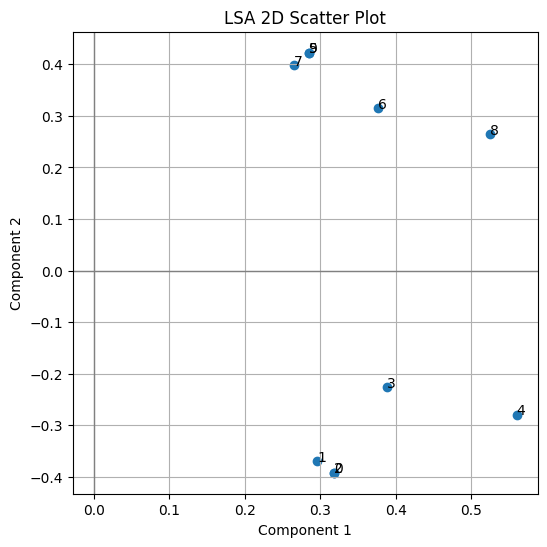

In [3]:
# x, y 분리
x = [v[0] for v in doc_lsa_dict.values()]
y = [v[1] for v in doc_lsa_dict.values()]

# 산점도 그리기
plt.figure(figsize=(6, 6))
plt.scatter(x, y)

# 문서 번호 라벨링
for i, (xi, yi) in doc_lsa_dict.items():
    plt.annotate(str(i), (xi, yi))

# 그래프 옵션
plt.axhline(0, color='gray', linewidth=1)  # x축
plt.axvline(0, color='gray', linewidth=1)  # y축
plt.title("LSA 2D Scatter Plot")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()